<a href="https://colab.research.google.com/github/HilkarSoberanes/ML/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=4 color='cornflowerblue'>

# Implementación una red neuronal de convolución usando el conjunto de datos mnist.



In [23]:
import numpy as np 
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import SGD
import keras.backend as K
from keras.layers import BatchNormalization                       
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow.keras.utils import to_categorical

np.random.seed(1)
%matplotlib inline

<font size = 5 color="cornflowerblue">

Parte I: **Análisis de datos**

<font size=4>

Importamos y cargamos la base de datos mnist de Keras:

<font size = 4>

*El conjunto de datos mnist se puede obtener directamente de Keras: [mnist Keras](https://keras.io/examples/vision/mnist_convnet/)*

In [24]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

<font size=4>

Exploramos los datos.
¿De qué tipo son los conjuntos que obtenidos?

In [25]:
print('El tipo de datos de x_train es', type(x_train))
print('El tipo de de datos de y_train es', type(y_train))

print('\nEl tipo de datos de x_test es', type(x_test))
print('El tipo de datos de y_test es', type(y_test))

El tipo de datos de x_train es <class 'numpy.ndarray'>
El tipo de de datos de y_train es <class 'numpy.ndarray'>

El tipo de datos de x_test es <class 'numpy.ndarray'>
El tipo de datos de y_test es <class 'numpy.ndarray'>


<font size=4>

¿Qué dimensión tienen los conjuntos?

In [26]:
print('La dimension de x_train es', x_train.shape)
print('La dimension y_train es', y_train.shape)

print('\nLa dimension de x_test es', x_test.shape)
print('La dimension de y_test es', y_test.shape)

La dimension de x_train es (60000, 28, 28)
La dimension y_train es (60000,)

La dimension de x_test es (10000, 28, 28)
La dimension de y_test es (10000,)


<font size=4>

¿Cómo se ve una muestra de entrenamiento?, ¿qué representa cada valor en la muestra?

In [27]:
sample = 0
print("The features of a training sample \n \n", x_train[sample])

The features of a training sample 
 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 


**La entrada para una muestra de los conjuntos de datos es una matriz, donde cada valor es el valor de un solo píxel.**

<font size=4>

¿Las muestras estan normalizadas?, en el caso de imágenes la normalizacion es dividir cada pixel por la intensidad máxima (255)

In [28]:
x_train.std()

78.56748998339798

In [29]:
train_x = x_train.astype("float32") / 255
test_x = x_test.astype("float32") / 255

<font size=4>


Ahora mostramos la imagen del ejemplo anterior y su correspondiente etiqueta. 


El valor y  de la primera muestra de entrenamiento es 5


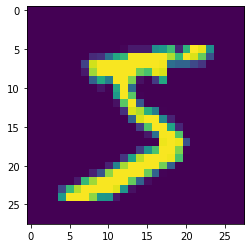

In [30]:
plt.imshow(x_train[sample]);

print("\nEl valor y  de la primera muestra de entrenamiento es",np.squeeze(y_train[sample]))

<font size=4>

¿Dada una muestra de entrada (input) ¿de qué forma se indica la etiqueta (output)?

**La etiqueta es un numero entero como se muestra a continuación**

In [31]:
y_train[sample]

5

<font size=4>

Conviertimos el output en representación one-hot. Para esto es usaremos la función de Keras [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function)



In [32]:
y_train.shape

(60000,)

In [33]:
y_train.reshape(-1)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
train_y=to_categorical(y_train, num_classes=10, dtype="float32")
test_y=to_categorical(y_test, num_classes=10, dtype="float32")


In [35]:
train_y.shape

(60000, 10)

In [36]:
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [37]:
train_y[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

La muestra 9 corresponde a 4
Su representación one-hot es = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


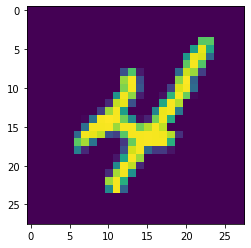

In [38]:
sample = 9

plt.imshow(train_x[sample]);

print('La muestra', sample, 'corresponde a', int(np.argmax(train_y[sample])))
print("Su representación one-hot es =", train_y[sample])

<font size=4>

Hasta aquí tenemos cuatro conjuntos de datos: los correspondientes a las entradas y las salidas de la red neuronal que se van a usar para el entrenamiento de la red (train_x y train_y) y los correspondientes a las entradas y salidas de la red neuronal que se van a usar para la prueba (test_x, test_y).

Mostramos las dimensiones de estos cuatro conjuntos.

In [39]:
print('La dimension de train_x es', train_x.shape)
print('La dimension train_y es', train_y.shape)

print('\nLa dimension de test_x es', test_x.shape)
print('La dimension de test_y es', test_y.shape)

La dimension de train_x es (60000, 28, 28)
La dimension train_y es (60000, 10)

La dimension de test_x es (10000, 28, 28)
La dimension de test_y es (10000, 10)


<font size = 5 color="cornflowerblue">

Parte II: **Implemetación de la red neuronal**

<font size=4>

Implementamos una red neuronal de convolución dentro de una función. Guiandonos de [mnist Keras](https://keras.io/examples/vision/mnist_convnet/) .
 

In [40]:
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  
       
    model.add(Conv2D(32, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
        
    model.add(MaxPooling2D()) 
    
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
               
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_MnistModel'))
    
    return model


<font size=4>

Llamamos a la función que creada con los argumentos adecuados.

In [41]:
one_image = (28, 28, 1)
activation='relu'
num_classes=10
dropout=True
batch_normalization=True

model = architecture(one_image,num_classes,activation,dropout,batch_normalization)

<font size=4>

Usamos la función plot_model para obtener una representación esquemática del modelo implementado. 

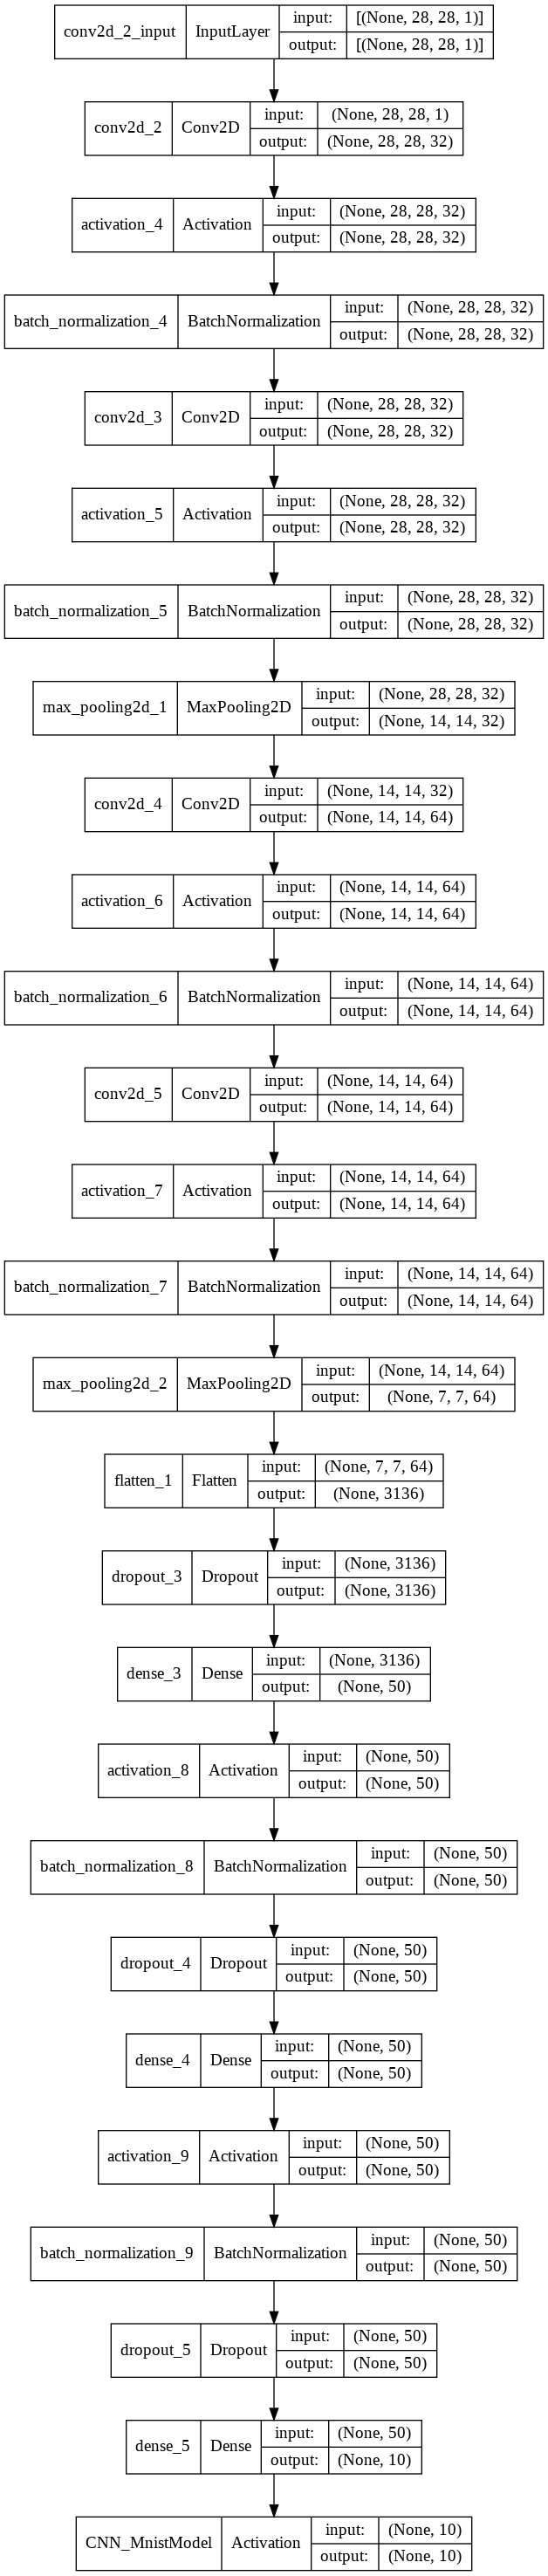

In [42]:
plot_model(model, to_file='mnist_model.png', show_shapes=True, rankdir='TB', show_layer_names=True)

<font size=4 color='black'> 
 [plot_model](https://keras.io/visualization/#training-history-visualization)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

<font size=4>

Compilamos el modelo seleccionando un optimizador (con una tasa de aprendizaje seleccionable), la función de costo (loss) y una metrica adecuadas para este problema.


In [44]:
learning_rate = 0.01

optimizer = SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)

In [45]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

In [46]:
model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=4>

Entrenamos la red neuronal implementada, indicamos la cantidad de datos a usar para validar el modelo, el número de epocas a utilizar así como el tamaño del batch. 

In [47]:
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

In [48]:
validation_portion = 0.1
batch_size=128
num_epochs = 100

history = model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, validation_split=validation_portion, shuffle=True, verbose=1)

Epoch 1/100
422/422 [==============================] - 19s 23ms/step - loss: 0.7190 - accuracy: 0.7910 - val_loss: 0.8194 - val_accuracy: 0.8003
Epoch 2/100
422/422 [==============================] - 9s 22ms/step - loss: 0.2926 - accuracy: 0.9269 - val_loss: 0.0826 - val_accuracy: 0.9800
Epoch 3/100
422/422 [==============================] - 9s 22ms/step - loss: 0.2135 - accuracy: 0.9456 - val_loss: 0.0693 - val_accuracy: 0.9830
Epoch 4/100
422/422 [==============================] - 9s 22ms/step - loss: 0.1724 - accuracy: 0.9555 - val_loss: 0.0543 - val_accuracy: 0.9850
Epoch 5/100
422/422 [==============================] - 10s 24ms/step - loss: 0.1505 - accuracy: 0.9613 - val_loss: 0.0467 - val_accuracy: 0.9872
Epoch 6/100
422/422 [==============================] - 9s 22ms/step - loss: 0.1338 - accuracy: 0.9647 - val_loss: 0.0426 - val_accuracy: 0.9880
Epoch 7/100
422/422 [==============================] - 9s 22ms/step - loss: 0.1196 - accuracy: 0.9681 - val_loss: 0.0393 - val_accurac

<font size=4>

Graficamos el costo en función de la epoca para los conjuntos de entrenamiento y de validación.

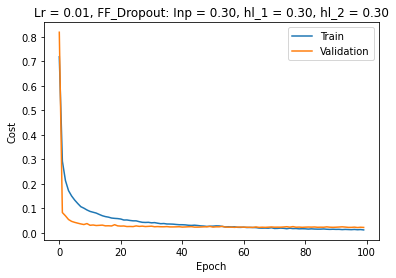

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lr = 0.01, FF_Dropout: Inp = 0.30, hl_1 = 0.30, hl_2 = 0.30')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<font size=4>

Graficamos el accuracy (la precisión del modelo) en función de la epoca para los conjuntos de entrenamiento y de validación.

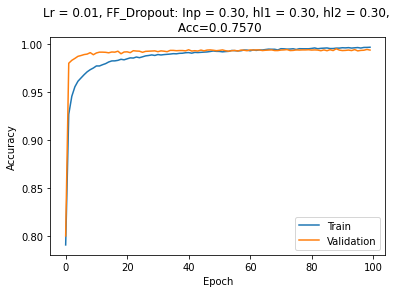

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Lr = 0.01, FF_Dropout: Inp = 0.30, hl1 = 0.30, hl2 = 0.30, \n Acc=0.0.7570')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<font size=4>

Evaluamos el modelo en el conjunto de prueba. Usamos el métodod evaluate()

In [51]:
evaluations = model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0190 - accuracy: 0.9949
Loss = 0.018981175497174263
Test Accuracy = 0.9948999881744385


<font size = 5 color="cornflowerblue">

Parte III: **Inferencia**

<font size=4>

Realizamos predicciones sobre el conjunto de prueba. Usamos el método predict()

In [52]:
test_x

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [53]:
test_x[31,:,:,0].shape

(28, 28)

the sample 31 corresponds to  1


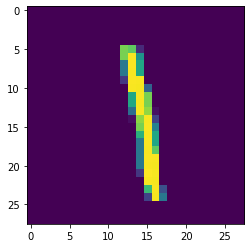

In [54]:
predictions = model.predict(test_x)
sample = 31

plt.imshow(test_x[sample,:,:,0])

print('the sample', sample, 'corresponds to ', int(np.argmax(test_y[sample])))


In [55]:
prediction = np.argmax(predictions[sample])

print('For the sample number', sample, 'the prediction is a(n)', prediction)

For the sample number 31 the prediction is a(n) 1
